## SJF - FCFS

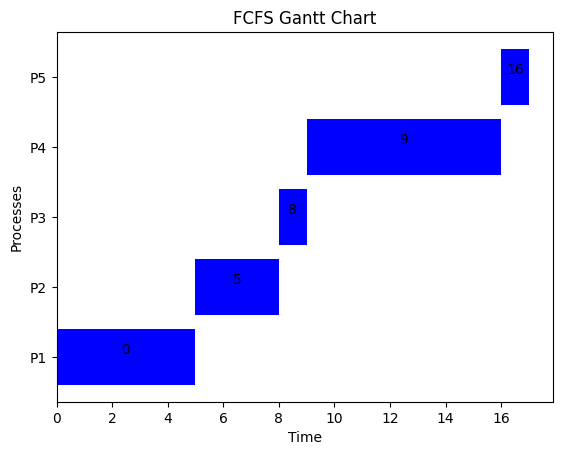

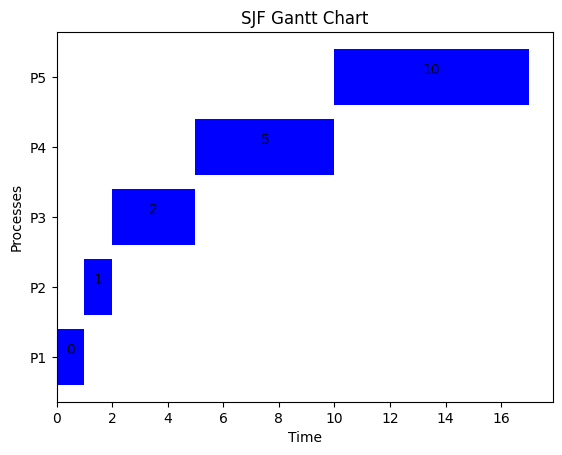

In [3]:
import matplotlib.pyplot as plt

def draw_gantt_chart(processes, burst_time, scheduling_type):
    num_processes = len(processes)
    start_time = 0
    end_time = 0

    # Sort processes by burst time for SJF
    if scheduling_type == 'SJF':
        sorted_processes = sorted(zip(processes, burst_time), key=lambda x: x[1])
    else:
        sorted_processes = zip(processes, burst_time)

    for i, process_info in enumerate(sorted_processes):
        process, burst = process_info
        end_time += burst
        plt.barh(process, left=start_time, width=burst, color='blue')
        plt.text(start_time + burst/2, i, start_time, ha='center', va='bottom')
        start_time += burst

    plt.yticks(range(num_processes), processes)
    plt.title(f'{scheduling_type} Gantt Chart')
    plt.xlabel('Time')
    plt.ylabel('Processes')
    plt.show()

processes = ['P1', 'P2', 'P3', 'P4', 'P5']
burst_time = [5, 3, 1, 7, 1]

draw_gantt_chart(processes, burst_time, 'FCFS')
draw_gantt_chart(processes, burst_time, 'SJF')

## Optimal - LRU


In [4]:
from collections import deque

def count_page_faults(pages, frames, algorithm):
    s = set()
    indexes = deque()
    page_faults = 0

    for i in range(len(pages)):
        if len(s) < frames:
            if pages[i] not in s:
                s.add(pages[i])
                page_faults += 1
                indexes.append(pages[i])
        else:
            if pages[i] not in s:
                if algorithm == 'LRU':
                    idx = 0
                else:  # Optimal
                    idx = -1
                    for j in range(frames):
                        if indexes[j] not in pages[i+1:]:
                            idx = j
                            break
                    if idx == -1:
                        furthest = 0
                        for j in range(frames):
                            temp = pages[i+1:].index(indexes[j])
                            if temp > furthest:
                                furthest = temp
                                idx = j
                s.remove(indexes[idx])
                s.add(pages[i])
                indexes[idx] = pages[i]
                page_faults += 1
    return page_faults

pages = ['P1.0', 'P2.1', 'P2.0', 'P2.3', 'P1.4', 'P1.5', 'P2.1', 'P1.0', 'P2.6']
frames = 3

print("Page Faults in LRU:", count_page_faults(pages, frames, 'LRU'))
print("Page Faults in Optimal:", count_page_faults(pages, frames, 'Optimal'))

Page Faults in LRU: 8
Page Faults in Optimal: 7
